In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
path='https://raw.githubusercontent.com/MatteoGandetto/Corso_ML_con_Python/master/Regressione_Lineare_Multipla_IN.csv'
INPUT_df = pd.read_csv(path)

In [3]:
INPUT_df.head()

,Superficie,Vani,Prezzo
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [4]:
INPUT_df.shape

(104, 3)

In [5]:
# remove nan values

INPUT_df = INPUT_df.dropna(1, "all") #remove rows
INPUT_df = INPUT_df.dropna(0, "all") #remove columns

In [6]:
# convert to numpy arrays

np_IN = np.array(INPUT_df)

In [7]:
# split into features and target columns

np_IN_X = np_IN[:,0]
np_IN_y = np_IN[:,2]

In [8]:
np_IN_X.shape

(104,)

In [9]:
np_IN_y.shape

(104,)

C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


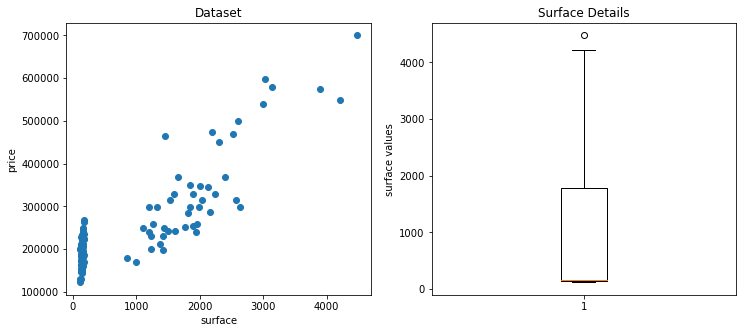

In [10]:
# plot data

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axs[0].scatter(np_IN_X, np_IN_y)
axs[0].set_xlabel("surface")
axs[0].set_ylabel("price")
axs[0].set_title("Dataset")
axs[1].boxplot(np_IN_X)
axs[1].set_ylabel("surface values")
axs[1].set_title("Surface Details")
fig.show()

<div class="alert alert-info" role="alert">
    <h1>DATA PREPROCESSING</h1>
</div>

In [11]:
# split dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_IN_X, np_IN_y, test_size=0.25)

<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

### Training process

In [12]:
# reshape features to be used with LinearRegression's methods

X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))
X_all=np.reshape(np_IN_X,(-1,1))

https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

In [13]:
# train linear regressor

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train_r, y_train)
print("Coefficiente angolare stimato", linear_reg.coef_)
print("Intercetta stimata", linear_reg.intercept_)

Coefficiente angolare stimato [96.79932722]
Intercetta stimata 164748.4775138346


### Prediction process

In [14]:
# predict using fitted model

y_pred_test = linear_reg.predict(X_test_r)
y_pred_train = linear_reg.predict(X_train_r)
y_pred_all = linear_reg.predict(X_all)

<div class="alert alert-info" role="alert">
    <h1>METRICS EVALUATION</h1>
</div>

In [15]:
#evaluate the model by using R2=1-RSE and MSE

from sklearn.metrics import mean_squared_error

R2=linear_reg.score(X_test_r,y_test)
MSE = mean_squared_error( y_test,y_pred_test)

R2_train=linear_reg.score(X_train_r,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)

print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

TEST
R^2= 0.6947264458254915 
MSE= 2813957030.563816 

TRAIN
R^2= 0.765968368139814 
MSE= 3275449617.662627 



<div class="alert alert-info" role="alert">
    <h1>PLOT RESULTS</h1>
</div>

C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


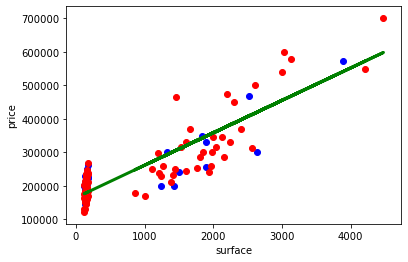

In [16]:
# plot regression line

fig, axs = plt.subplots(1,1)
axs.set_xlabel('surface')
axs.set_ylabel('price')
axs.scatter(X_test, y_test, color="blue")
axs.scatter(X_train, y_train, color='red')
axs.plot(X_all, y_pred_all, c='green', linewidth=3)
fig.show()